### Python module-ok, package-ek és library-k


<p><b>Module</b>: Egy darab .py file (e.g., base_container.py), amit importálni lehet. </p>

<p><b>Package</b>: Egy folder/mappa amiben található egy __init__.py fájl. 
<br>Fontos: 
<li>A folder-ben több Module is lehet. (több .py file)</li>
<li>Az __init__.py file jelenléte mutatja a python interpreternek, hogy adott folder tartalma package-ként értelmezendő.</li>
<li>Az __init__.py file lehet üres. (Sőt legtöbbször az...) Ha az __init__.py nem üres, akkor általában valami package szintű inicializációt rejtenek el benne.</li>
</p>
<p><b>Library</b>: package-ek és module-ok gyűjteménye, ami más számára is felhasználható. Példák: Numpy, Pandas, Seaborn, Matplotlib etc.</p>

<p><b> Általában: Python-ban a project folder struktúrája indukálja a kód struktúrát. A megfelelő folder struktúra segítségével építhetjük fel a saját package-ünket. <br> A mappa- és fájlstruktúra határozza meg, hogyan lehet a kódot modulokként és csomagként (package) használni és importálni.
</b></p>

<p><b>Abszolút import</b>: Project root-ból. Például: from sajat_package.module_a import module_a</p>
<p><b>Relatív import</b>: Package-en belül... "." -> a jelenlegi package. ".." -> a package feletti package. </p>


### Verem (Stack) és Sor (Queue)

<p> <b>FIFO</b> - (First In, First Out): Az elsőként beérkezett elemek kerülnek először felhasználásra.
<br> -> Queue / Sor
</p>

<p> <b>LIFO</b> - (Last In, First Out): Az utoljára beérkezett elemek kerülnek először felhasználásra.
<br> -> Stack / Verem
</p>

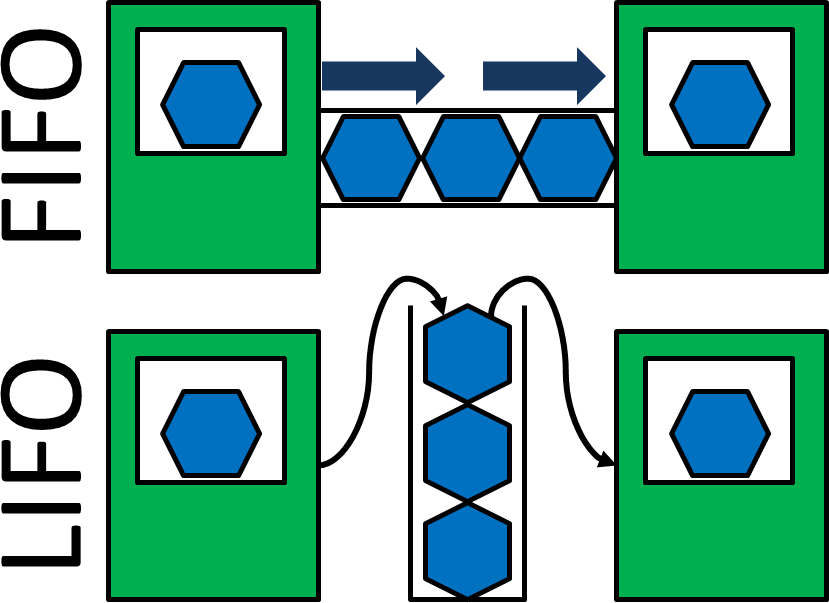

In [1]:
from IPython.display import Image
Image(filename="resources/FIFO-vs-LIFO.png", width=500)

### Illusztráció ( a mellékelt s10 package használatára )

In [2]:
from s10.element_loaders.txt_loader import read_txt_file
from s10.simple_containers.queue import Queue
from pathlib import Path
# sys path insert?
# import sys
# sys.path.insert(0, "???")

In [3]:
# 10. heti feladt sor 1. feladat:
# Készítsünk egy Sor osztályt, amely egy listában tárolja az elemeket és implementálja a szokásos műveleteket
# (létrehoz, sorba, sorból, soreleje, üres_e, üres, töröl)! Teszteljük!
# Nézzük meg, hogy a Queue osztály valóban tudja-e ezeket!

gyak10f1_queue = Queue()

gyak10f1_queue.add(1)
gyak10f1_queue.add(2)
print(f"Tartalom : {str(gyak10f1_queue)}")

elso_torolt_elem = gyak10f1_queue.remove()
print(f"Első törölt elem : {str(elso_torolt_elem)}")
print(f"A Queue üres : {str(gyak10f1_queue.is_empty())}")

masodik_torolt_elem = gyak10f1_queue.remove()
print(f"Második törölt elem : {str(masodik_torolt_elem)}")
print(f"A Queue üres : {str(gyak10f1_queue.is_empty())}")

try:
    gyak10f1_queue.remove()
except Exception as e:
    print(e)

Tartalom : Queue(12)
Első törölt elem : 1
A Queue üres : False
Második törölt elem : 2
A Queue üres : True
We cannot remove from an empty Queue!


### Feladatok

In [4]:
# 10. heti feladat sor 5. feladat:
# Készítsd el a saját Verem osztályodat
# a megszokott műveletekkel (létrehoz, verembe, veremből, tető, üres-e, üres)! Teszteld le!
# ITT most írjuk meg a verem osztályt úgy, hogy kompatibilis legyen a Queue osztályból
# és a simple_containers. CustomContainer metódusait implementáljuk!

In [5]:
from s10.simple_containers.stack import Stack


gyak10f1_stack = Stack()

gyak10f1_stack.add(1)
gyak10f1_stack.add(2)
print(f"Tartalom : {str(gyak10f1_stack)}")

elso_torolt_elem = gyak10f1_stack.remove()
print(f"Első törölt elem : {str(elso_torolt_elem)}")
print(f"A Queue üres : {str(gyak10f1_stack.is_empty())}")

masodik_torolt_elem = gyak10f1_stack.remove()
print(f"Második törölt elem : {str(masodik_torolt_elem)}")
print(f"A Queue üres : {str(gyak10f1_stack.is_empty())}")

try:
    gyak10f1_stack.remove()
except Exception as e:
    print(e)

Tartalom : Stack(12)
Első törölt elem : 2
A Queue üres : False
Második törölt elem : 1
A Queue üres : True
We cannot remove from an empty Stack!


In [6]:
# 10. heti feladat sor 2. feladat:
# Készíts alkalmazást, amelyik egy szövegmanipulációt végez. Az S szövegben lehetnek ( ) zárójelekbe tett részek,
# és a zárójelekbe tett részekben is lehetnek újabb zárójeles részek, akár többszörös mélységben is.
# Állítsd elő ebből azt a kimenetet, ami úgy készül, hogy a zárójelbe tett részeket teljes egészében kihagyja!
# Feltehetjük, hogy helyesen vannak elhelyezve a zárójelek. A megoldásban használj sort!
# pl. túró(lekvár( szilva) sa(j)t)gombóc => túrógombóc
# Használd az általad készített sort!
# Használd a deque duplavégű sor adatszerkezetet!

In [7]:
input_path = Path(
    r"K:\python_lecture\d2024202502\python_lecture\L10_modules_classes_paths\s10\example_inputs"
)
example_input = read_txt_file(input_path / "s10_f2_pelda_3.txt")

In [8]:
example_input

'Összetett (garbage(garbage)) példa a (garbage2(garbage2(garbage2))) (garbage2) tesztelés végrehajtásához. \n/Remélem kimaradt a garbage szó az előző mondatból./\nRandom szöveg\n'

In [9]:
selection_queue = Queue()
parenthesis_level = 0
for c in example_input:
    # ()
    if c == "(":
        parenthesis_level +=1
        continue
    if c == ")":
        parenthesis_level -=1
        continue
    if parenthesis_level == 0:
        selection_queue.add(c)
    
print(selection_queue)

Queue(Összetett  példa a   tesztelés végrehajtásához. 
/Remélem kimaradt a garbage szó az előző mondatból./
Random szöveg
)


In [34]:
input_path = Path(
    r"K:\python_lecture\d2024202502\python_lecture\L10_modules_classes_paths\s10\example_inputs"
)
print(Path().cwd())

example_input = read_txt_file(Path().absolute() / "s10" / "example_inputs" / "s10_f2_pelda_1.txt")

k:\python_lecture\d2024202502\python_lecture\L10_modules_classes_paths


In [27]:
selection_stack = Stack()
for c in example_input:
    if c == ")":
        while selection_stack.remove() != "(":
            pass
        # while check_last_elemt.remove() != "(":
        #     selection_stack.remove()
        # selection_stack.remove()  # removes the "(" element
    else:
        selection_stack.add(c)
        
print(selection_stack)

Stack(lekvárgombóc)


In [28]:
# Készíts alkalmazást, amelyik beolvas egy szöveget és megállapítja, hogy palindrom-e
# (visszafelé olvasva ugyanazt adja-e a szóközök elhagyásával pl. indul a görög aludni). A megoldáshoz használj sort és vermet!
# Használd az általad készített verem osztályt!
# Használd a dequet erre a feladatra!

In [29]:
example_long = "indul a görög aludni"
example_short = "görög"